In [48]:
import os
from PIL import Image 
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
path = "../data_cap/Labeled_data/" # labeled data path
file_list = os.listdir(path)
#len(file_list) # 701

total_rgb = []  # 파일별로 중복 제거한 (R, G, B) 리스트 (이중 리스트)
for index, file in enumerate(file_list):
    # 진행과정 확인
    if index % 50 == 0: print(index)
    im = Image.open(path+file)
    
    rgb_im = im.convert("RGB")
    row = im.size[0]
    col = im.size[1]
    
    temp = []  # 해당 파일의 (R, G, B) 리스트  
    for r in range(0, row):
        for c in range(0, col):
            temp.append(rgb_im.getpixel((r, c)))
    total_rgb.append(list(set(temp)))
    
total_rgb = sum(total_rgb, [])  # flatten
len(total_rgb)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700


11582

In [4]:
rgb_unq = list(set(total_rgb))  # 추출된 모든 색상 (중복 제거)

rgb_count = {}  # {'key': 'value'} = {(R, G, B): 등장한 이미지 카운트}
for index in range(len(rgb_unq)):
    count = total_rgb.count(rgb_unq[index])
    rgb_count[rgb_unq[index]] = count

#total_count

# 이미지 카운트 값 기준으로 내림차순 정렬
rgb_sorted = sorted(rgb_count.items(), key=lambda x: x[1], reverse=True)  
rgb_sorted[:30]

[((128, 64, 128), 701),
 ((0, 0, 0), 701),
 ((128, 128, 128), 699),
 ((192, 192, 128), 699),
 ((128, 0, 192), 696),
 ((128, 0, 0), 687),
 ((0, 0, 192), 672),
 ((64, 0, 128), 643),
 ((64, 64, 0), 640),
 ((128, 128, 0), 637),
 ((128, 128, 64), 599),
 ((0, 64, 64), 471),
 ((64, 192, 0), 470),
 ((128, 64, 64), 435),
 ((192, 128, 128), 419),
 ((0, 128, 192), 365),
 ((64, 64, 128), 364),
 ((64, 128, 192), 304),
 ((192, 192, 0), 292),
 ((64, 0, 192), 243),
 ((64, 192, 128), 189),
 ((192, 128, 192), 184),
 ((192, 128, 64), 156),
 ((192, 0, 128), 114),
 ((128, 128, 192), 55),
 ((64, 128, 64), 26),
 ((192, 0, 64), 21),
 ((0, 0, 64), 20),
 ((192, 0, 192), 14),
 ((0, 128, 64), 10)]

In [5]:
# 최종 top 30 RGB 데이터 (plot 그리기 위한 변환 과정)
color_top30 = []  
for i in range(30):
    color_top30.append(list(rgb_sorted[i][0]))
    
color_top30

[[128, 64, 128],
 [0, 0, 0],
 [128, 128, 128],
 [192, 192, 128],
 [128, 0, 192],
 [128, 0, 0],
 [0, 0, 192],
 [64, 0, 128],
 [64, 64, 0],
 [128, 128, 0],
 [128, 128, 64],
 [0, 64, 64],
 [64, 192, 0],
 [128, 64, 64],
 [192, 128, 128],
 [0, 128, 192],
 [64, 64, 128],
 [64, 128, 192],
 [192, 192, 0],
 [64, 0, 192],
 [64, 192, 128],
 [192, 128, 192],
 [192, 128, 64],
 [192, 0, 128],
 [128, 128, 192],
 [64, 128, 64],
 [192, 0, 64],
 [0, 0, 64],
 [192, 0, 192],
 [0, 128, 64]]

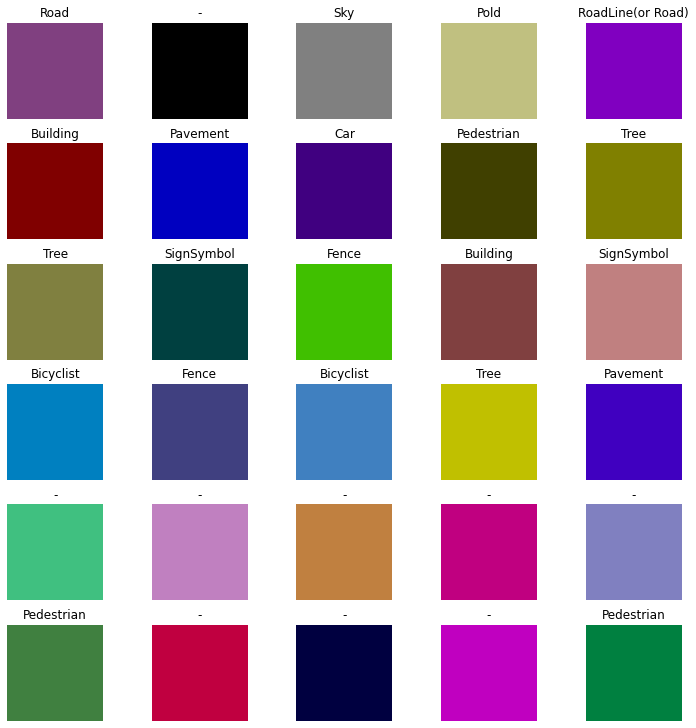

In [6]:
# 색상 확인
fig, axs = plt.subplots(6, 5, figsize = (10, 10), constrained_layout = True)

# 레이블 = ['Bicyclist', 'Pedestrian', 'Car', 'Fence', 'SignSymbol', 'Tree', 'Pavement', 'Road', 'Pole', 'Building', 'Sky']

label = ['Road', '-', 'Sky', 'Pold', 'RoadLine(or Road)', 
         'Building', 'Pavement', 'Car', 'Pedestrian', 'Tree', 
         'Tree', 'SignSymbol', 'Fence', 'Building', 'SignSymbol', 
         'Bicyclist', 'Fence', 'Bicyclist', 'Tree', 'Pavement', 
         '-', '-', '-', '-', '-', 
         'Pedestrian', '-', '-', '-', 'Pedestrian']

num=0
for i in range(6):
    for j in range(5):
        axs[i][j].imshow([[color_top30[num]]*5]*5)
        axs[i][j].grid(False)
        axs[i][j].set_title(label[num])
        axs[i][j].axis('off')
        num+=1

In [26]:
# create csv file

rgb_data = pd.DataFrame(color_top30, label)
rgb_data.columns = ['r', 'g', 'b']
rgb_data

rgb_data.to_csv("./rgb_seg.csv", header=True, index=True)

In [ ]:
### 04.03 Create all label of RGB data (11classes)

In [97]:
rgb_unq = list(set(total_rgb)) # 이미지 파일에서 추출된 모든 rgb값
all_rgb = pd.DataFrame(rgb_unq)
all_rgb.columns = ['r', 'g', 'b']
all_rgb

,r,g,b
0,128,128,102
1,0,0,64
2,0,128,192
3,128,128,21
4,111,111,0
...,...,...,...
81,26,26,26
82,2,2,0
83,128,128,69
84,50,50,50


In [103]:
label_colors = pd.read_csv("./label_colors.csv") # 11 classes
label_colors.head(10)

,label,r,g,b
0,Bicyclist,0,128,192
1,Bicyclist,192,0,192
2,Building,192,0,128
3,Building,0,128,64
4,Building,128,0,0
5,Building,64,0,64
6,Building,64,192,0
7,Car,64,0,128
8,Car,128,64,64
9,Car,64,128,192


In [98]:
# left join
all_label = pd.merge(all_rgb, label_colors, on=['r', 'g', 'b'], how='left')
all_label = all_label.fillna('Void')
all_label

,r,g,b,label
0,128,128,102,Void
1,0,0,64,Pole
2,0,128,192,Bicyclist
3,128,128,21,Void
4,111,111,0,Void
...,...,...,...,...
81,26,26,26,Void
82,2,2,0,Void
83,128,128,69,Void
84,50,50,50,Void


In [99]:
all_label.to_csv("./label_rgb_all.csv", header=True, index=True) # 최종 label 데이터

In [95]:
# 확인
pd.DataFrame(all_label['label']).melt().groupby(['variable','value']).size().to_frame(name='n')

n
variable value         
label    Bicyclist    2
         Building     5
         Car          4
         Fence        1
         Pavement     3
         Pedestrian   4
         Pole         2
         Road         3
         SignSymbol   3
         Sky          1
         Tree         2
         Void        56